In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None 

In [2]:
#4.1
data = pd.read_csv('D:\intern\module 1\jetairways_edited.csv')

In [3]:
data['Call'] = pd.Series()

In [4]:
#till 14th row bollinger columns are empty
for i in range(13,len(data)):
    if (data['Close Price'][i]<data['lowbound'][i]):
        data['Call'][i] = 'Buy'
    elif (data['lowbound'][i]<=data['Close Price'][i]<data['movavg_14day'][i]):
        data['Call'][i] = 'Hold Buy/ Liquidate Short'
    elif (data['movavg_14day'][i]<=data['Close Price'][i]<data['uppbound'][i]):
        data['Call'][i] = 'Hold Short/ Liquidate Buy'
    elif (data['Close Price'][i]>=data['uppbound'][i]):
        data['Call'][i] = 'Short'

In [5]:
data.head(20)

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,movavg_21day,movavg_34day,movavg_14day,stddiv_14day,uppbound,lowbound,Call
0,0,JETAIRWAYS,EQ,2017-05-15,519.45,520.00,533.40,517.10,527.80,527.50,...,25433,430754,23.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,JETAIRWAYS,EQ,2017-05-16,527.50,527.00,536.50,524.65,534.00,534.15,...,23991,284837,20.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,JETAIRWAYS,EQ,2017-05-17,534.15,532.00,534.75,526.20,530.00,528.90,...,10219,53551,7.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,JETAIRWAYS,EQ,2017-05-18,528.90,525.15,538.60,517.50,517.70,522.70,...,25651,309608,18.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,JETAIRWAYS,EQ,2017-05-19,522.70,525.60,532.90,517.45,521.00,520.40,...,20409,257037,20.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,JETAIRWAYS,EQ,2017-05-22,520.40,521.70,525.15,469.00,479.50,475.65,...,46980,659957,20.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,JETAIRWAYS,EQ,2017-05-23,475.65,485.00,489.00,465.30,471.90,472.85,...,38240,255332,8.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,JETAIRWAYS,EQ,2017-05-24,472.85,473.30,479.90,458.00,466.00,464.80,...,37266,402723,17.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,JETAIRWAYS,EQ,2017-05-25,464.80,468.10,473.30,459.90,469.70,468.95,...,25019,435427,22.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,JETAIRWAYS,EQ,2017-05-26,468.95,477.70,491.75,475.10,483.75,483.40,...,29370,350943,13.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
X = data.iloc[13:,[9,18,20,21]].values
y = data.iloc[13:,-1].values

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_y = LabelEncoder()
y = lb_y.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [9]:
y_test.shape

(73,)

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  
print(cm)

[[ 4  4  0  0]
 [ 1 30  0  0]
 [ 0  6 21  0]
 [ 0  0  7  0]]


In [13]:
(4+30+21)/73 #0.7534 accuracy

0.7534246575342466

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  8  0  0]
 [ 0 31  0  0]
 [ 0 14 13  0]
 [ 0  0  7  0]]


In [15]:
(31+13)/73 #0.60 accuracy

0.6027397260273972

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  6  2  0]
 [ 0 29  2  0]
 [ 0 24  3  0]
 [ 0  5  2  0]]


In [17]:
(29+3)/73 #0.438 accuracy

0.4383561643835616

In [18]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 3  5  0  0]
 [ 1 30  0  0]
 [ 0  5 22  0]
 [ 0  0  5  2]]


In [19]:
(3+30+22+2)/73 #0.78 accuracy

0.7808219178082192

In [20]:
#therefor knn has got highest accuracy

In [21]:
data_new = pd.read_csv('D:\intern\module 1\Small_Cap\IDFC.csv')
data_new = data_new[data_new['Series']=='EQ']

In [22]:
data_new['movavg14day'] = data_new['Average Price'].rolling(14).mean()
data_new['stddiv14day'] = data_new['Average Price'].rolling(14).std()

In [23]:
data_new['uppbound'] = data_new['movavg14day'] + 2*data_new['stddiv14day']
data_new['lowbound'] = data_new['movavg14day'] - 2*data_new['stddiv14day']

In [24]:
data_new['Call'] = pd.Series()

In [25]:
data_new.head(20)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,movavg14day,stddiv14day,uppbound,lowbound,Call
0,IDFC,EQ,15-May-2017,63.35,63.95,64.35,63.25,63.65,63.70,63.74,2754130,1.755433e+08,10529,1119918,40.66,NaN,NaN,NaN,NaN,NaN
1,IDFC,EQ,16-May-2017,63.70,64.00,64.60,62.90,64.55,64.25,63.80,4014549,2.561355e+08,12172,1694524,42.21,NaN,NaN,NaN,NaN,NaN
2,IDFC,EQ,17-May-2017,64.25,64.65,64.65,63.25,63.25,63.35,63.58,4184709,2.660487e+08,6189,2802239,66.96,NaN,NaN,NaN,NaN,NaN
3,IDFC,EQ,18-May-2017,63.35,62.40,62.60,61.20,61.35,61.50,61.85,6040654,3.736229e+08,14151,2475921,40.99,NaN,NaN,NaN,NaN,NaN
4,IDFC,EQ,19-May-2017,61.50,61.85,62.30,60.30,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28,NaN,NaN,NaN,NaN,NaN
5,IDFC,EQ,22-May-2017,61.15,61.30,61.70,60.00,60.10,60.20,60.62,3714457,2.251839e+08,9335,1491139,40.14,NaN,NaN,NaN,NaN,NaN
6,IDFC,EQ,23-May-2017,60.20,60.30,60.45,57.30,58.20,58.25,58.59,3616589,2.118975e+08,9665,897898,24.83,NaN,NaN,NaN,NaN,NaN
7,IDFC,EQ,24-May-2017,58.25,58.20,58.90,56.40,56.75,56.90,57.52,4987978,2.869050e+08,9410,1666628,33.41,NaN,NaN,NaN,NaN,NaN
8,IDFC,EQ,25-May-2017,56.90,57.30,58.35,56.20,57.70,57.60,57.54,29243828,1.682797e+09,30826,18794467,64.27,NaN,NaN,NaN,NaN,NaN
9,IDFC,EQ,26-May-2017,57.60,57.80,59.60,57.50,59.45,59.25,58.79,4264464,2.507168e+08,7597,1994291,46.77,NaN,NaN,NaN,NaN,NaN


In [26]:
X2 = data_new.iloc[13:,[8, 15, 17, 18]].values

In [27]:
sc_X2 = StandardScaler()
X2 = sc_X.fit_transform(X2)

In [28]:
y2 = classifier.predict(X2)

In [29]:
X2[:5]

array([[1.04017612, 1.14880378, 1.29390614, 0.97017406],
       [1.06987921, 1.112786  , 1.20100758, 0.99304274],
       [1.02235427, 1.07215726, 1.08112035, 1.03421025],
       [0.98671057, 1.02883153, 0.93250898, 1.09925515],
       [0.98671057, 1.0011657 , 0.84431302, 1.13396718]])

In [30]:
y2[:5]

array([1, 1, 1, 1, 1])

In [31]:
y2 = lb_y.inverse_transform(y2)

In [32]:
# leaving 1st 14 nulls
data_new['Call'][13:] = y2

In [33]:
data_new.head(20)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,movavg14day,stddiv14day,uppbound,lowbound,Call
0,IDFC,EQ,15-May-2017,63.35,63.95,64.35,63.25,63.65,63.70,63.74,2754130,1.755433e+08,10529,1119918,40.66,NaN,NaN,NaN,NaN,NaN
1,IDFC,EQ,16-May-2017,63.70,64.00,64.60,62.90,64.55,64.25,63.80,4014549,2.561355e+08,12172,1694524,42.21,NaN,NaN,NaN,NaN,NaN
2,IDFC,EQ,17-May-2017,64.25,64.65,64.65,63.25,63.25,63.35,63.58,4184709,2.660487e+08,6189,2802239,66.96,NaN,NaN,NaN,NaN,NaN
3,IDFC,EQ,18-May-2017,63.35,62.40,62.60,61.20,61.35,61.50,61.85,6040654,3.736229e+08,14151,2475921,40.99,NaN,NaN,NaN,NaN,NaN
4,IDFC,EQ,19-May-2017,61.50,61.85,62.30,60.30,61.00,61.15,61.20,3697284,2.262721e+08,7537,1711047,46.28,NaN,NaN,NaN,NaN,NaN
5,IDFC,EQ,22-May-2017,61.15,61.30,61.70,60.00,60.10,60.20,60.62,3714457,2.251839e+08,9335,1491139,40.14,NaN,NaN,NaN,NaN,NaN
6,IDFC,EQ,23-May-2017,60.20,60.30,60.45,57.30,58.20,58.25,58.59,3616589,2.118975e+08,9665,897898,24.83,NaN,NaN,NaN,NaN,NaN
7,IDFC,EQ,24-May-2017,58.25,58.20,58.90,56.40,56.75,56.90,57.52,4987978,2.869050e+08,9410,1666628,33.41,NaN,NaN,NaN,NaN,NaN
8,IDFC,EQ,25-May-2017,56.90,57.30,58.35,56.20,57.70,57.60,57.54,29243828,1.682797e+09,30826,18794467,64.27,NaN,NaN,NaN,NaN,NaN
9,IDFC,EQ,26-May-2017,57.60,57.80,59.60,57.50,59.45,59.25,58.79,4264464,2.507168e+08,7597,1994291,46.77,NaN,NaN,NaN,NaN,NaN


In [34]:
data_new.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,movavg14day,stddiv14day,uppbound,lowbound,Call
490,IDFC,EQ,07-May-2019,37.75,38.0,38.60,36.90,37.15,37.10,37.72,3697713,1.394837e+08,6148,1609390,43.52,42.465000,3.188544,48.842088,36.087912,Hold Buy/ Liquidate Short
491,IDFC,EQ,08-May-2019,37.10,37.0,38.65,36.85,37.55,37.60,37.90,7364218,2.791014e+08,11206,2871606,38.99,41.851429,3.180911,48.213252,35.489606,Hold Buy/ Liquidate Short
492,IDFC,EQ,09-May-2019,37.60,37.9,38.10,36.95,37.45,37.60,37.57,7376399,2.771038e+08,8362,3335703,45.22,41.184286,3.013392,47.211071,35.157501,Hold Buy/ Liquidate Short
493,IDFC,EQ,10-May-2019,37.60,37.6,38.20,37.25,38.10,38.10,37.81,2626094,9.929210e+07,8188,563859,21.47,40.563571,2.714377,45.992325,35.134818,Hold Buy/ Liquidate Short
494,IDFC,EQ,13-May-2019,38.10,37.8,37.80,34.35,34.90,34.75,35.64,16211123,5.777244e+08,21287,7776099,47.97,39.831429,2.544197,44.919822,34.743035,Hold Buy/ Liquidate Short


In [35]:
#4.2
stock = pd.read_csv('D:\intern\module 1\Small_Cap\VENKEYS.csv')

In [36]:
stock['OC_pec_ch'] = (stock['Close Price'] - stock['Open Price'])*100/stock['Open Price']
stock['HL_perc_ch'] = (stock['High Price'] - stock['Low Price'])*100/stock['Low Price']
stock['5_day_mean'] = stock['Close Price'].pct_change().rolling(5).mean()
stock['5_day_std'] = stock['Close Price'].pct_change().rolling(5).std()

In [37]:
stock['Action'] = pd.Series()
for i in range(0,len(stock)-1):
    if(stock['Close Price'][i+1]>stock['Close Price'][i]):
        stock['Action'][i] = 1
    else:
        stock['Action'][i] = -1

In [38]:
stock.tail()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,OC_pec_ch,HL_perc_ch,5_day_mean,5_day_std,Action
489,VENKEYS,EQ,07-May-2019,2014.90,2025.00,2057.80,1990.0,2013.80,2000.45,2027.54,36714,7.443911e+07,4129,11592,31.57,-1.212346,3.407035,-0.007053,0.022812,-1.0
490,VENKEYS,EQ,08-May-2019,2000.45,1997.90,2000.45,1950.0,1956.75,1956.70,1971.81,29889,5.893555e+07,3671,12658,42.35,-2.062165,2.587179,-0.003884,0.018102,-1.0
491,VENKEYS,EQ,09-May-2019,1956.70,1959.75,1977.95,1921.2,1925.05,1930.10,1946.26,35929,6.992725e+07,4586,13245,36.86,-1.512948,2.953883,-0.005696,0.018629,-1.0
492,VENKEYS,EQ,10-May-2019,1930.10,1935.00,1962.90,1802.2,1810.00,1820.65,1850.03,301338,5.574854e+08,25294,48819,16.20,-5.909561,8.916879,-0.014617,0.029796,-1.0
493,VENKEYS,EQ,13-May-2019,1820.65,1810.00,1810.00,1700.0,1701.00,1706.75,1746.56,105506,1.842727e+08,10731,36173,34.29,-5.704420,6.470588,-0.032381,0.025502,NaN


In [39]:
X3 = stock.iloc[5:-1,[15,16,17,18]].values
y3 = stock.iloc[5:-1,-1].values

In [40]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size = 0.15, random_state = 0)

In [41]:
sc_X3 = StandardScaler()
X3_train = sc_X3.fit_transform(X3_train)
X3_test = sc_X3.transform(X3_test)

In [42]:
classifier2 = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier2.fit(X3_train,y3_train)
y_pred3 = classifier2.predict(X3_test)

In [43]:
y3_test.shape

(74,)

In [44]:
cm = confusion_matrix(y3_test,y_pred3)
print(cm)

[[40  8]
 [21  5]]


In [45]:
(40+5)/74 #0.60 accuracy

0.6081081081081081

In [46]:
#computing net cummulative returns
add = 0
stock['cm_rt'] = pd.Series()
for i in range(0,len(stock['OC_pec_ch'])):
    add = add + stock['OC_pec_ch'][i]
    stock['cm_rt'][i] = add

In [47]:
stock['Date'] = pd.to_datetime(stock['Date'])

In [48]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

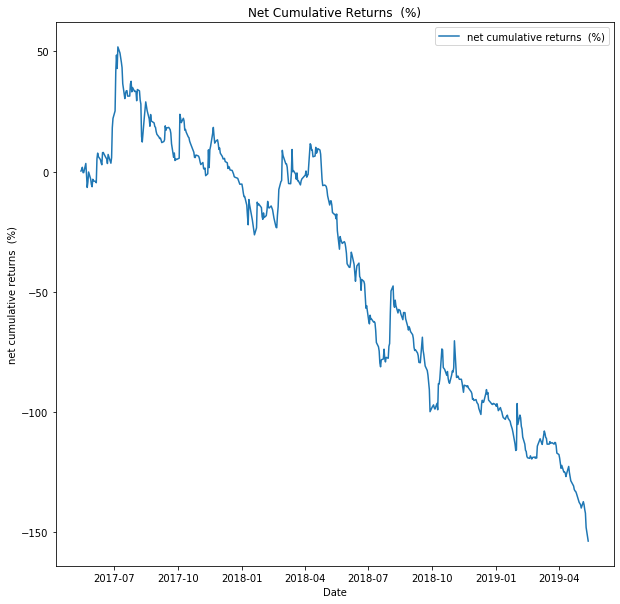

In [49]:
plt.figure(figsize=(10,10))
plt.plot(stock['Date'],stock['cm_rt'],label='net cumulative returns  (%)')
plt.xlabel('Date')
plt.ylabel('net cumulative returns  (%)')
plt.title('Net Cumulative Returns  (%)')
plt.legend()
plt.show()

In [50]:
data_new.to_csv('D:\intern\module 1\IDFC_edited.csv')
stock.to_csv('D:\intern\module 1\VENKEYS_edited.csv')